<a href="https://colab.research.google.com/github/oveay/AM/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 3

### Исходная функция и функция для построения графиков

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm


def func():
    func_name = "func = (x_1) ^ (2) + (x_2) ^ (2) - x_1 * x_2"

    def func_value(x):
        return (x[0]) ** 2 + x[1] ** 2 - x[0] * x[1]

    def grad_value(x):
        return [2 * x[0] - x[1], 2 * x[1] - x[0]]

    return func_name, func_value, grad_value


def graphing(func, list_X):
    func_name, func_value, grad_value = func()
    list_x, list_y, list_z = [], [], []
    for i in range(len(list_X)):
        list_x.append(list_X[i][0])
        list_y.append(list_X[i][1])
        list_z.append(func_value(list_X[i]))

    x = np.arange(-10, 10, 0.1)
    y = np.arange(-10, 10, 0.1)
    x, y = np.meshgrid(x, y)
    z = np.array([func_value([x[i], y[i]]) for i in range(len(x))])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(x, y, z, color='white')

    ax.scatter(list_x, list_y, list_z, color='red', s=5)
    ax.scatter([list_x[-1]], [list_y[-1]], [list_z[-1]], color='red', s=20)
    plt.show()

## Вспомогательные функции

In [8]:
def add(x1, x2):
    return [x1[i] + x2[i] for i in range(len(x1))]


def multi(a, x):
    return [x[i] * a for i in range(len(x))]


def scalar_prod(x, y):
    sum = 0
    for i in range(len(x)):
        sum += x[i] * y[i]
    return sum

## Градиентный спуск

Метод градиентного спуска — численный метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента, один из основных численных методов современной оптимизации.

Пусть перед нами стоит задача минимизации некоторой функции:
$$ \Large f(x) → min_{x \in X} $$

Основная идея метода заключается в том, чтобы идти в направлении наискорейшего спуска, а это направление задаётся антиградиентом  $-\nabla f(x)$:

$$ \Large x_{i+1} = x_i + \alpha * \nabla f(x_i)$$

где $\alpha$ - некоторая величина, задающая скорость спуска. Величина шага модет быть выбрана несколькими способами.

#### Формальный алгоритм

1. Задаем начальнуую точку $x_0$ и желаемую точность $ \varepsilon $
2. Рассчитывае шаг по формуле.
3. Проверяем условие остновки:
 -  Если $ |x_{i+1} - x_i| > \varepsilon, $ или $ |f(x_{i+1} - f(x_i)| > \varepsilon$,  то переходим к шагу 2.
 - Иначе $ x = x_{i+1} $ и остановка.

 Рассмторим более конкретные реализации.

## Метод градиентного спуска с постоянным шагом

Метод градиентного спуска с постоянным шагом подразумевает, что при запуске алгоритма мы задаем некоторое $\alpha = const$. Для упрощения работы алгоритма было добавлено максимальное число итераций `max_iter`, после которого алгоритма останавливается. Условие остановки: $ |x_{i+1} - x_i| > \varepsilon $

Этот метод является оптимальным для, например, Липщиц-непрерывных функций : $ \alpha = {1 \over L}$.

In [3]:
def const_gradient_descent(func, X0, alpha=0.01, eps=1e-4):
    func_name, func_value, grad_value = func()
    number = 1
    list_x, list_y, list_X = [], [], []
    list_x.append(X0[0])
    list_y.append(X0[1])
    list_X.append(X0)

    last_X = X0
    curr_X = add(last_X, multi(-alpha, grad_value(last_X)))
    while abs(func_value(curr_X) - func_value(last_X)) > eps:
        list_x.append(curr_X[0])
        list_y.append(curr_X[1])
        list_X.append(curr_X)

        last_X = curr_X
        curr_X = add(last_X, multi(-alpha, grad_value(last_X)))
        number += 1
    return number, list_X

## Метод наискорейшего спуска

Суть метода заключается в подборе максимального эффективного $\alpha$ на каждом шаге.

$$ \Large \alpha_i = arg min f(x_{i+1}) = arg min f(x_i - \alpha * \nabla f(x_i)) $$

Поиск оптимального шага на каждой итерации является задачей одномерной оптимизации по скалярной величине $\alpha$.

$$ \Large f(x_{i+1}) \rightarrow min $$
$$ \Large f(x_i - \alpha * \nabla f(x_i)) $$
$$ \Large \phi(\alpha) $$
где $x_i$ и $\nabla f(x_i)$ известный на каждом шаге. ы

Важной особенностью данного метода является форма траектории - оротогональная "елочка" или, по научному, зиг-заг. В нашей реализации используется метод одномерной оптимизации метод золотого сечения.

In [43]:
def dithochomia_method(func, x, p, number, eps):
    func_name, func_value, grad_value = func()
    first_number = 0
    sec_number = number

    while sec_number - first_number > eps:
        if func_value(add(x, multi((first_number + sec_number) / 2 - eps / 3, p))) > func_value(
                add(x, multi((first_number + sec_number) / 2 + eps / 3, p))):
            first_number = (first_number + sec_number) / 2 - eps / 3
        else:
            sec_number = (first_number + sec_number) / 2 + eps / 3
    return (first_number + sec_number) / 2

def fast_gradient_descent(func, X0, eps=1e-4):
    func_name, func_value, grad_value = func()
    number = 1
    list_x, list_y, list_X = [], [], []
    list_x.append(X0[0])
    list_y.append(X0[1])
    list_X.append(X0)

    last_X = X0
    alpha = dithochomia_method(func, last_X, multi(-1, grad_value(last_X)),
                               2 / (scalar_prod(grad_value(last_X), grad_value(last_X))) ** (1 / 2), eps)
    curr_X = add(last_X, multi(-alpha, grad_value(last_X)))
    while abs(func_value(curr_X) - func_value(last_X)) > eps:
        list_x.append(curr_X[0])
        list_y.append(curr_X[1])
        list_X.append(curr_X)

        last_X = curr_X
        alpha = dithochomia_method(func, last_X, multi(-1, grad_value(last_X)),
                                   2 / (scalar_prod(grad_value(last_X), grad_value(last_X))) ** (1 / 2), eps)
        curr_X = add(last_X, multi(-alpha, grad_value(last_X)))
        number += 1
    return number, list_X

## Градиентный спуск с дроблением шага по методу Гольдштейна-Армихо (Армихо-Вульфа)
Если методы одномерной оптимизации неприменимы, то можно воспользовать некоторым неточным линейным поиском.
Рассмотрим следующую функцию:

$$ \Large \phi(\alpha) = f(x_i - \alpha * \nabla f(x_i)), \alpha > 0 $$

Аппроксимируем:

$$ \Large \phi(\alpha) \approx f(x_i) - \alpha * \nabla f(x_i) * \nabla f(x_i) $$

Так же рассмотрим:

$$ \Large \phi(\alpha)_1 = f(x_i) - \alpha * A * (\nabla f(x_i))^2$$
$$ \Large \phi(\alpha)_2 = f(x_i) - \alpha * B * (\nabla f(x_i))^2$$

пояснение к картинке: я её упер с чьей-то лекции, они там вместо $\alpha$ говорили $\eta$ и $k$ вместо $i$

![графики](https://storage.yandexcloud.net/ivanovfedor-study/Screen%20Shot%202023-06-02%20at%2018.06.32%20(2).png)

Задача сводится к тому, чтобы найти такие значения $\alpha$, что

$$ \Large \phi(\alpha)_1 < \phi(\alpha) < \phi(\alpha)_2$$

In [24]:
def crush_gradient_descent(func, X0, alpha=0.01, eps=1e-4):
    func_name, func_value, grad_value = func()
    number = 1
    list_x, list_y, list_X = [], [], []
    list_x.append(X0[0])
    list_y.append(X0[1])
    list_X.append(X0)

    last_X = X0
    curr_alpha = alpha
    while func_value(add(last_X, multi(-curr_alpha, grad_value(last_X)))) > func_value(
            last_X) - 0.1 * alpha * scalar_prod(grad_value(last_X), grad_value(last_X)):
        curr_alpha = curr_alpha * 0.95
    curr_X = add(last_X, multi(-curr_alpha, grad_value(last_X)))
    while abs(func_value(curr_X) - func_value(last_X)) > eps:
        list_x.append(curr_X[0])
        list_y.append(curr_X[1])
        list_X.append(curr_X)

        last_X = curr_X
        curr_alpha = alpha
        while func_value(add(last_X, multi(-curr_alpha, grad_value(last_X)))) > func_value(
                last_X) - 0.1 * alpha * scalar_prod(grad_value(last_X), grad_value(last_X)):
            curr_alpha = curr_alpha * 0.95
        curr_X = add(last_X, multi(-curr_alpha, grad_value(last_X)))
        number += 1
    return number, list_X

## Метод сопряжённых градиентов

Изначально метод сопряженных градиентов разработали для решения систем линейных уравнений $Ax = b$.

Проблема метода наискорейшего спуска и его аналогов заключается в том, что они зависят от числа обусловленности и требуют относительно много обращений к оракулу. Другой не менее важной проблемой является большая зивсимость времени работы алгоритма от выбора начальной точки

Есть некоторые фокусы:

$$ \large x_{i+1} = x_i = \alpha_i * p^i, i = 0, 1, ... x_0 \in E^n, p^0 = -\nabla f(x_0) $$

$$ \large \alpha_i : f(x_i + \alpha_i * p^i) = min f(x_i + \alpha_i * p^k) $$
$$ \large p^{i+1} = -\nabla f(x_{i+1}) + \beta_i * p^k $$

$$ \large \beta_{i+1} = {|| \nabla f(x_{i+1}) ||^2 \over ||\nabla f(x_i) ||^2} $$

Мы подбираем такое $\beta$, чтобы при минимизации нашей функции (если она квадратичная и имеет положительную матрицу), мы бы получили последовательность A-ортогональных или же A-сопряженных векторов. На сколько я понял, идея в том, что мы меняем скалярное произведение так , чтобы мы каждый раз стремились в центр некоторого элипса, оказываясь на его оси,.

In [6]:
def conjugate_gradients(func, X0, N, eps):
    func_name, func_value, grad_value = func()
    number = 0
    list_X = []
    list_X.append(X0)
    last_X = X0
    p = multi(-1, grad_value(last_X))

    alpha = dithochomia_method(func, last_X, p, 2 / (scalar_prod(grad_value(last_X), grad_value(last_X))) ** (1 / 2),
                               eps)
    curr_X = add(last_X, multi(alpha, p))
    list_X.append(curr_X)
    while scalar_prod(grad_value(curr_X), grad_value(curr_X)) ** (1 / 2) > eps:
        number += 1
        if number == N:
            number = 0
            p = multi(-1, grad_value(last_X))
        else:
            b = scalar_prod(grad_value(curr_X), grad_value(curr_X)) / scalar_prod(grad_value(last_X),
                                                                                  grad_value(last_X))
            p = add(multi(-1, grad_value(curr_X)), multi(b, p))
        alpha = dithochomia_method(func, curr_X, p,
                                   2 / (scalar_prod(grad_value(curr_X), grad_value(curr_X))) ** (1 / 2), eps)
        last_X = curr_X
        curr_X = add(last_X, multi(alpha, p))
        list_X.append(curr_X)
    return number, list_X

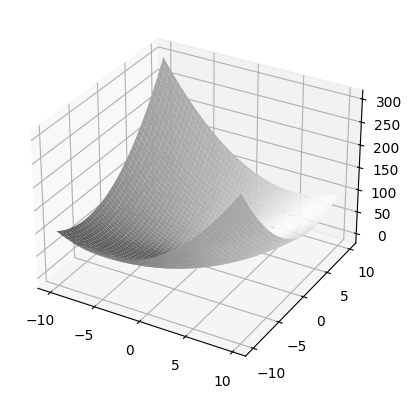

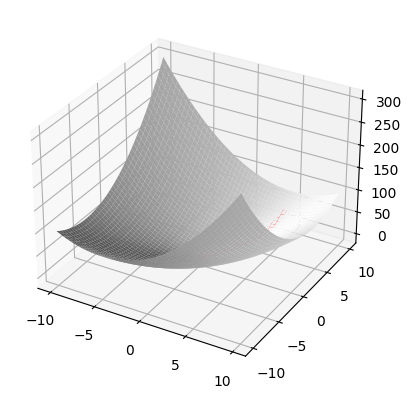

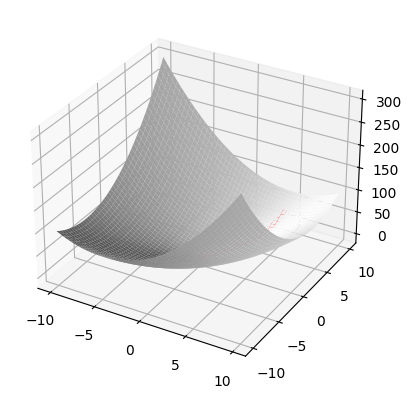

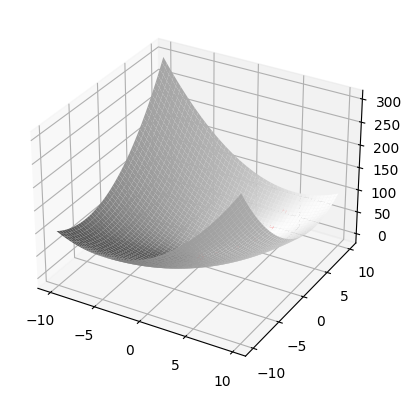

In [44]:
number, list_X = conjugate_gradients(func, [5, 8], 30, 0.000001)
number, list_X2 = crush_gradient_descent(func, [5, 8])
number, list_X3 = const_gradient_descent(func, [5, 8])
number, list_X4 = fast_gradient_descent(func, [5, 8])

graphing(func, list_X)
graphing(func, list_X2)
graphing(func, list_X3)
graphing(func, list_X4)